# Air Quality and Pollution Assessment

## Dataset Overview
This dataset focuses on air quality assessment across various regions. It comprises 5000 samples and includes essential environmental and demographic factors that influence pollution levels. The target variable is categorized into distinct air quality levels: Good, Moderate, Poor, and Hazardous.

### Key Features

- **Temperature (°C):** Average temperature of the region.
- **Humidity (%):** Relative humidity recorded in the region.
- **PM2.5 Concentration (µg/m³):** Fine particulate matter levels.
- **PM10 Concentration (µg/m³):** Coarse particulate matter levels.
- **NO2 Concentration (ppb):** Nitrogen dioxide levels.
- **SO2 Concentration (ppb):** Sulfur dioxide levels.
- **CO Concentration (ppm):** Carbon monoxide levels.
- **Proximity to Industrial Areas (km):** Distance to the nearest industrial zone.
- **Population Density (people/km²):** Number of people per square kilometer in the region.

### Target Variable: Air Quality Levels

- **Good:** Clean air with low pollution levels.
- **Moderate:** Acceptable air quality but with some pollutants present.
- **Poor:** Noticeable pollution that may cause health issues for sensitive groups.
- **Hazardous:** Highly polluted air posing serious health risks to the population.

### Applications

This dataset can be utilized for:

1. **Predictive Modeling:** Creating machine learning models to predict air quality levels based on environmental and demographic features.
2. **Policy Development:** Assisting policymakers in identifying regions requiring urgent interventions.
3. **Health Impact Studies:** Analyzing the correlation between pollution levels and health outcomes.
4. **Urban Planning:** Guiding urban developers to mitigate pollution risks in densely populated or industrial areas.

### Steps for Machine Learning Model Development

1. **Data Analysis:** Perform an exploratory data analysis (EDA) to understand the distribution of features, identify outliers, and analyze correlations between variables.
   - Visualize feature distributions and relationships.
   - Check for missing values and handle them appropriately.

2. **Data Preparation:**
   - Scale and normalize the data if necessary.
   - Encode categorical variables.
   - Split the dataset into training and testing sets.

3. **Modeling:**
   - Train a machine learning model (e.g., Random Forest, Gradient Boosting, Neural Networks) to predict air quality levels.
   - Evaluate model performance using metrics like accuracy, precision, recall, and F1 score.

4. **Optimization:**
   - Perform hyperparameter tuning to improve model performance.
   - Explore feature selection or dimensionality reduction techniques if needed.

5. **Insights Generation:**
   - Visualize the results of the model predictions.
   - Identify the most important features contributing to air quality levels.

6. **Deployment:**
   - Create a pipeline for real-time or batch predictions.
   - Share insights and results with stakeholders through visualizations and reports.

### Conclusion

This dataset provides a comprehensive basis for understanding and predicting air quality variations across regions. By following the outlined steps, we can build a robust machine learning model to derive actionable insights and contribute to combatting pollution and safeguarding public health.


In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Read in order data and customer data
df = pd.read_csv('pollution_dataset.csv')

In [3]:
display(df)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,27.2,51.7,35.1,46.2,26.7,32.2,0.98,11.2,314,Hazardous
1,26.3,59.3,1.0,6.2,38.3,20.4,0.68,13.5,298,Good
2,27.9,73.2,20.0,39.4,19.6,5.8,0.95,5.4,309,Good
3,23.9,51.9,14.7,24.3,5.2,12.6,1.24,4.5,282,Poor
4,25.2,59.0,26.3,30.9,26.8,13.5,1.06,5.6,293,Poor
...,...,...,...,...,...,...,...,...,...,...
4995,29.3,36.8,80.3,90.9,9.2,14.1,0.97,10.2,287,Moderate
4996,15.7,51.7,0.7,11.4,40.5,13.8,1.07,4.2,320,Good
4997,27.8,48.1,8.9,16.4,8.6,17.7,0.54,0.3,302,Moderate
4998,30.4,50.4,2.2,18.8,13.1,22.3,0.94,6.7,308,Moderate


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [5]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.464580,60.068140,29.905580,40.003700,21.00036,15.141060,0.904314,5.031880,299.948200
std,5.486219,15.044806,30.285899,30.693124,11.30099,7.668466,0.297840,5.010352,17.215133
min,3.500000,10.000000,0.000000,-1.400000,-13.50000,0.000000,-0.080000,0.000000,243.000000
25%,21.800000,49.900000,8.500000,18.900000,13.80000,9.900000,0.700000,1.500000,288.000000
50%,25.300000,60.200000,20.600000,31.100000,20.50000,15.100000,0.905000,3.500000,300.000000
75%,28.900000,70.100000,41.500000,51.500000,27.50000,20.400000,1.100000,6.900000,311.000000
max,46.200000,100.000000,249.000000,256.100000,96.40000,41.700000,2.140000,46.300000,358.000000


In [6]:
# First thing, I wanna give a look to the dataframe, and try to understand the data.
# Checking for missing values
display(df.isnull().sum())

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

There are no missing values

To get a better understaing of the data, I think the best choice is to make some plot. This help me to visualise the data, try to understand itself, and maybe try to find some correlation among data.

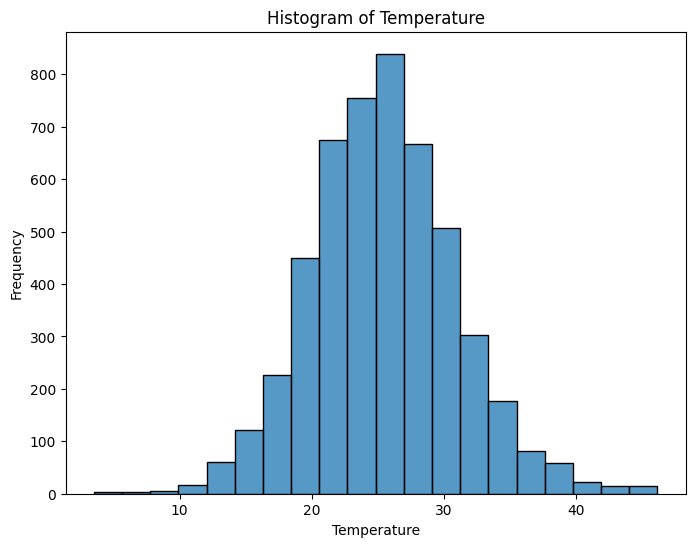

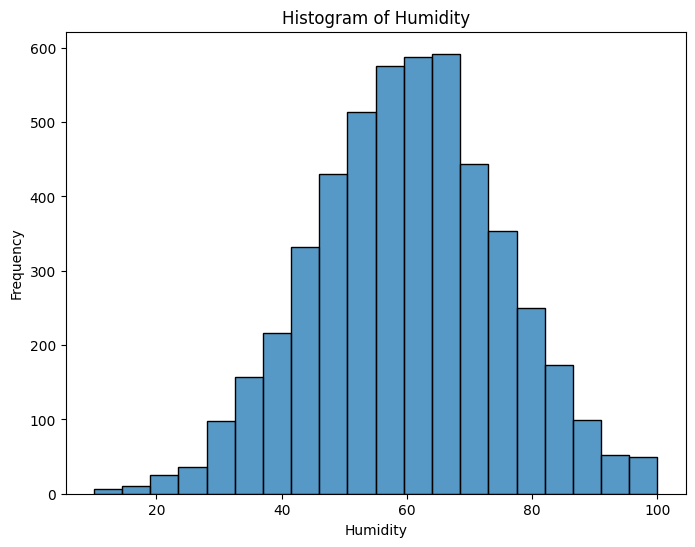

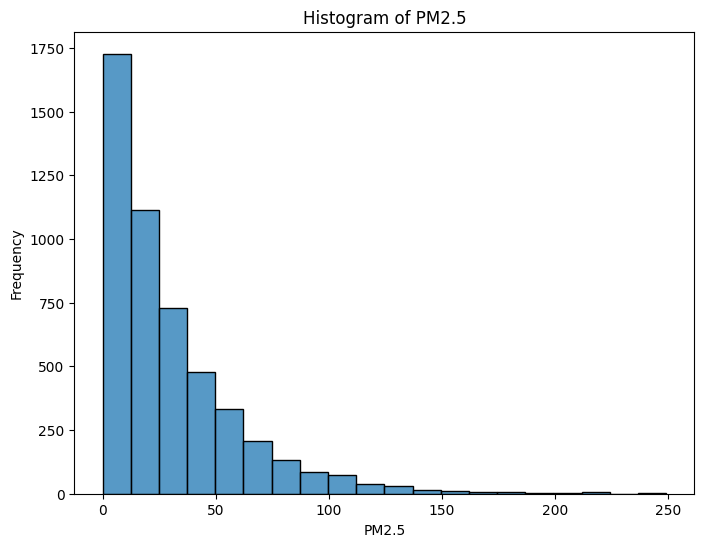

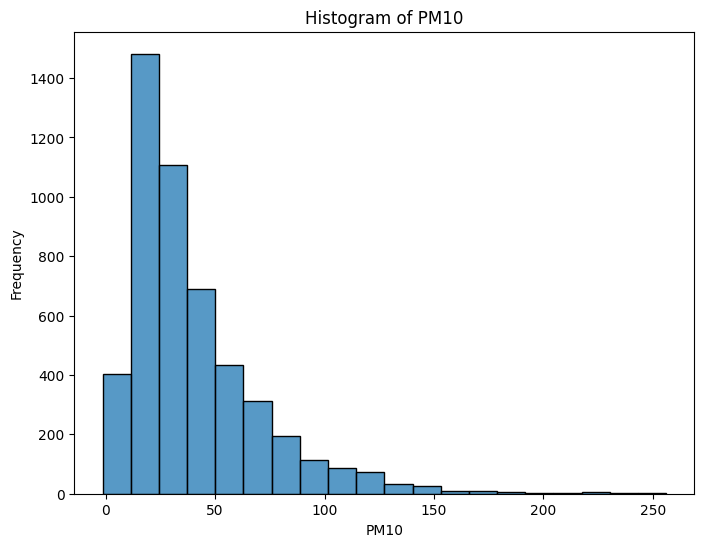

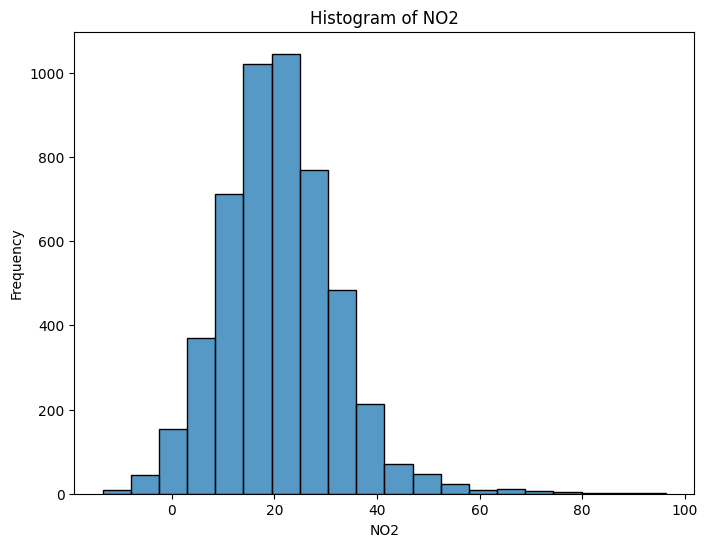

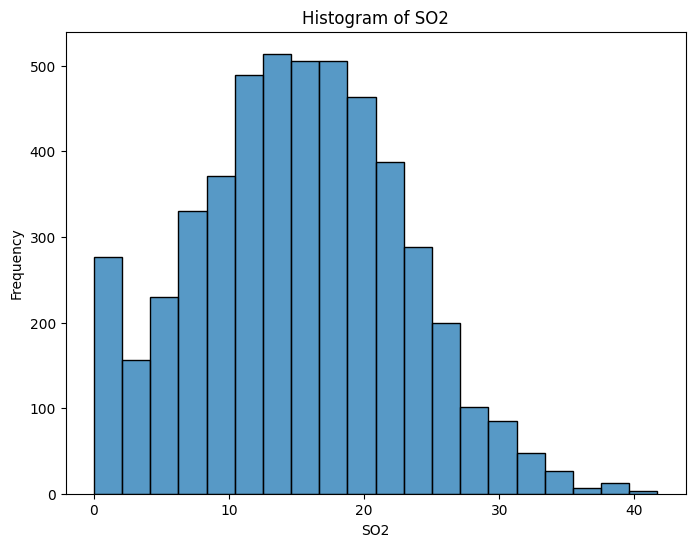

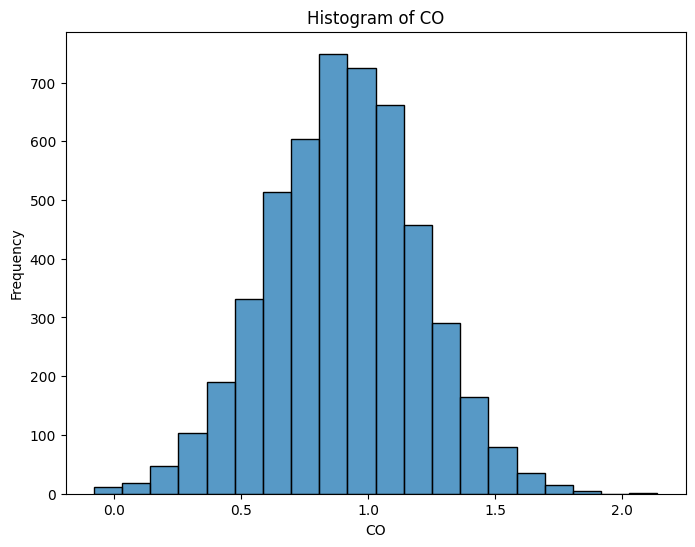

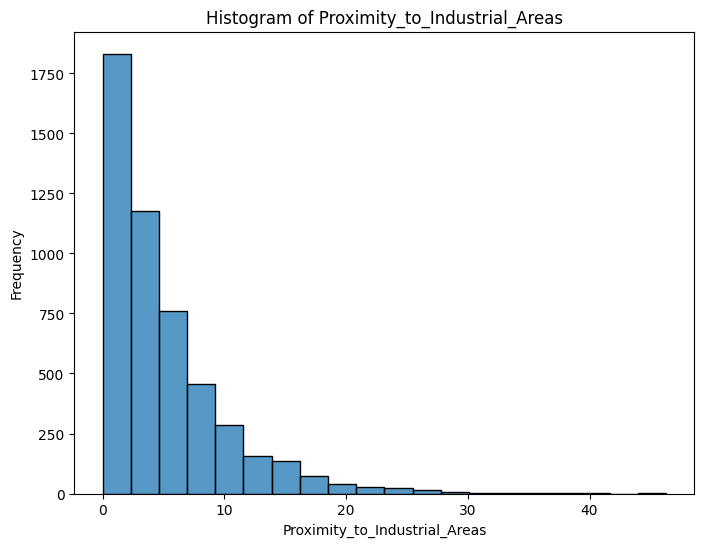

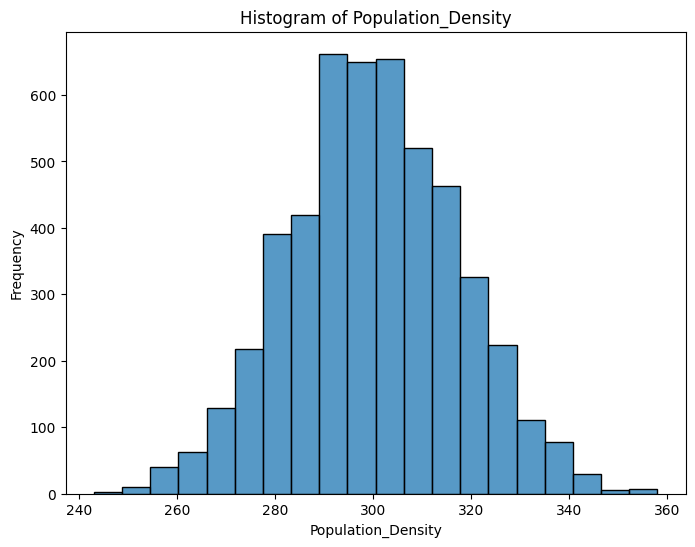

In [21]:
features = ['Temperature','Humidity','PM2.5','PM10','NO2','SO2','CO','Proximity_to_Industrial_Areas','Population_Density']

target = ['Air Quality']

# Create histograms
for column in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
df_positive = df[(df[features] > 0).all(axis=1)]

In [20]:
display(df_positive.isnull().sum())

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

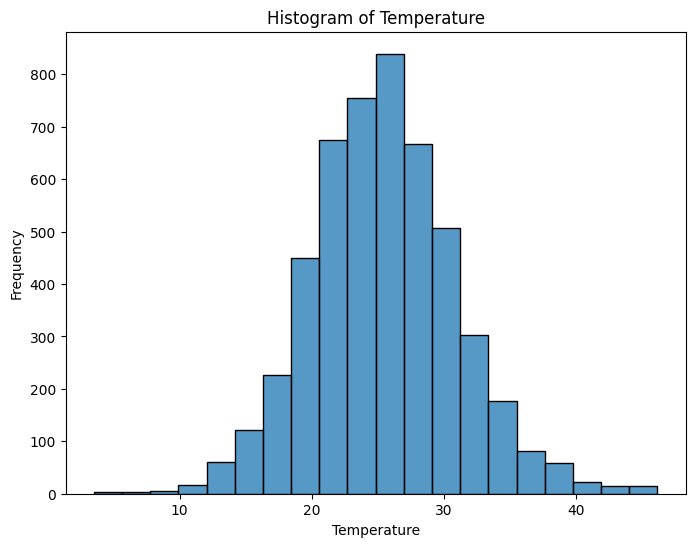

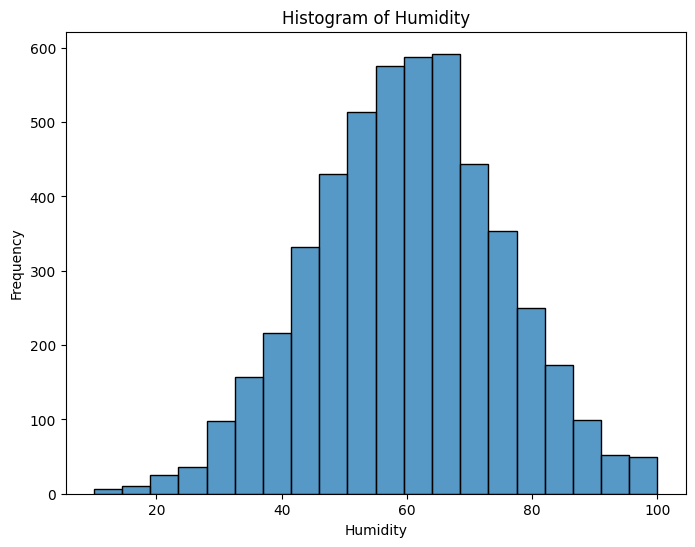

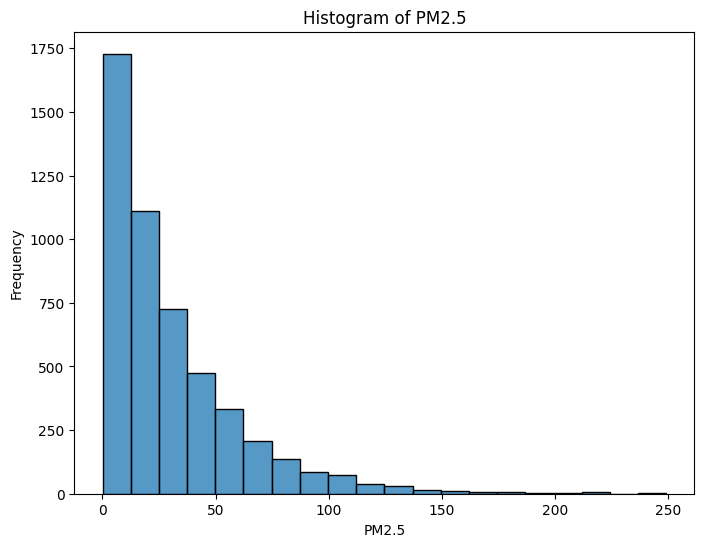

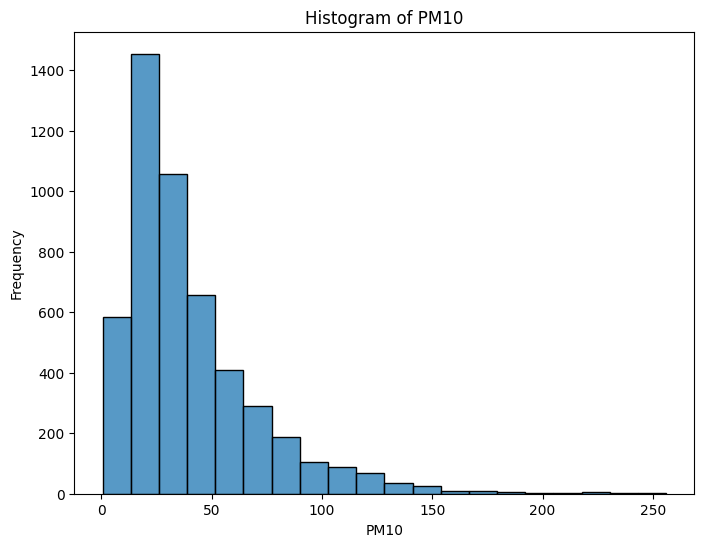

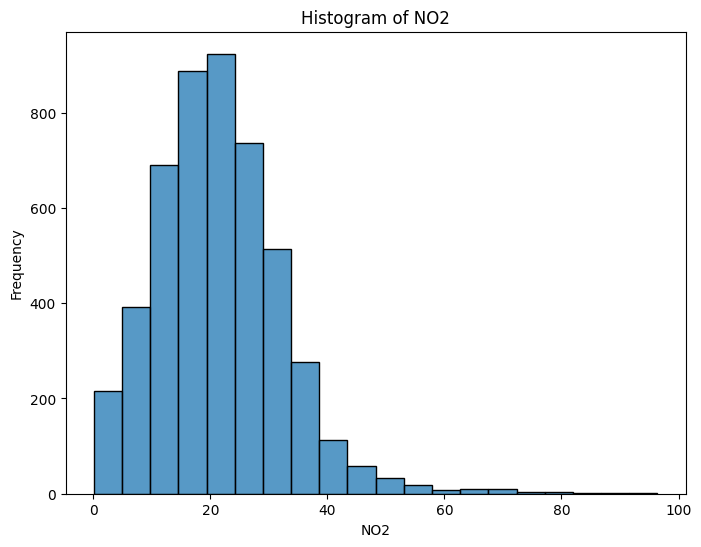

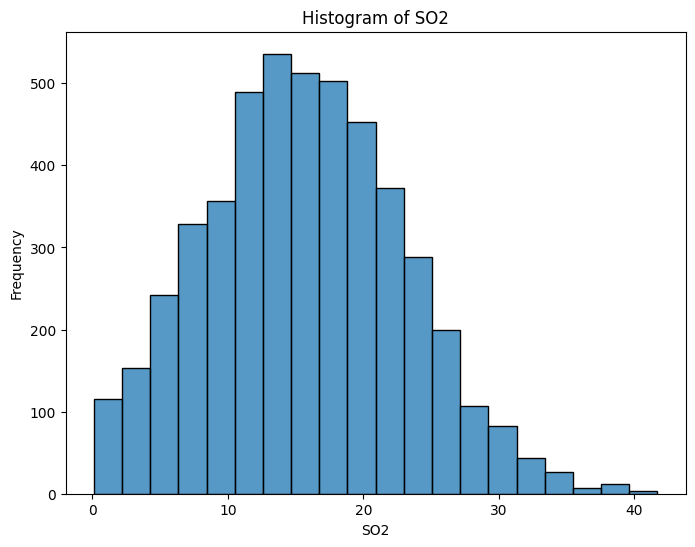

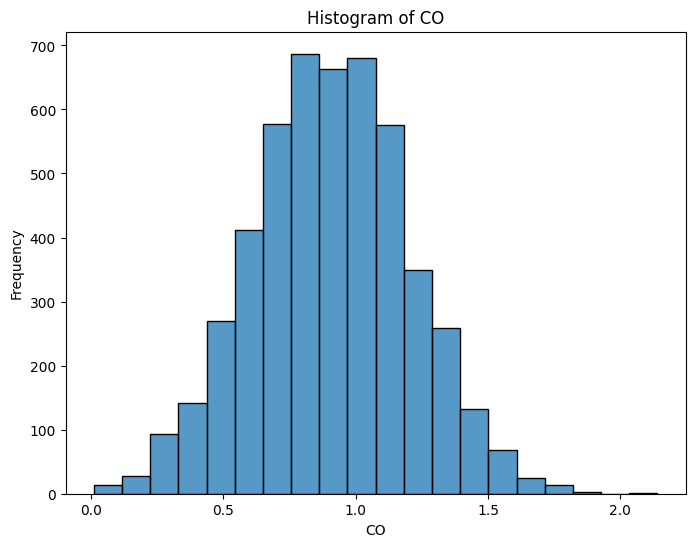

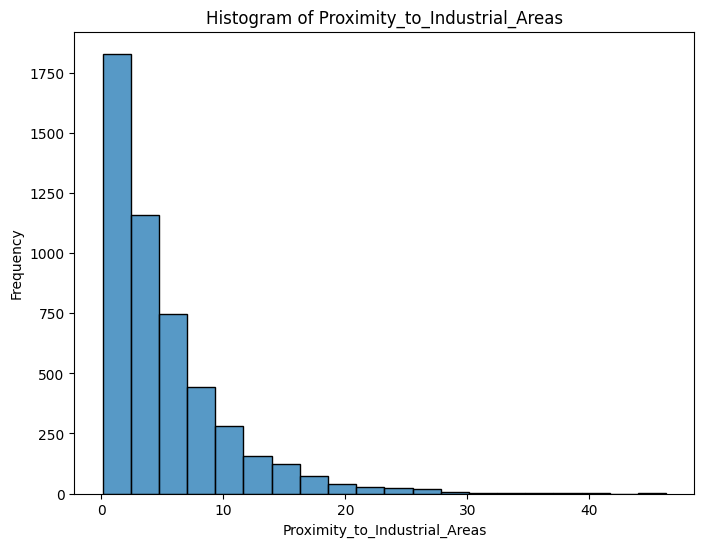

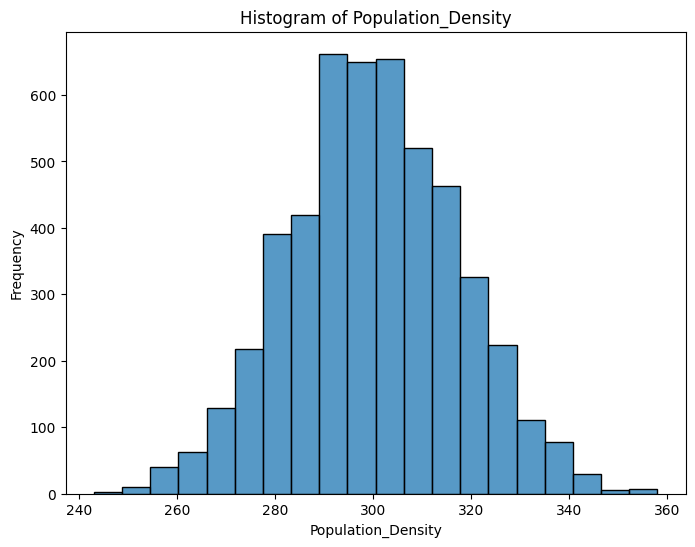

In [10]:
# Create histograms
for column in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_positive[column], bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

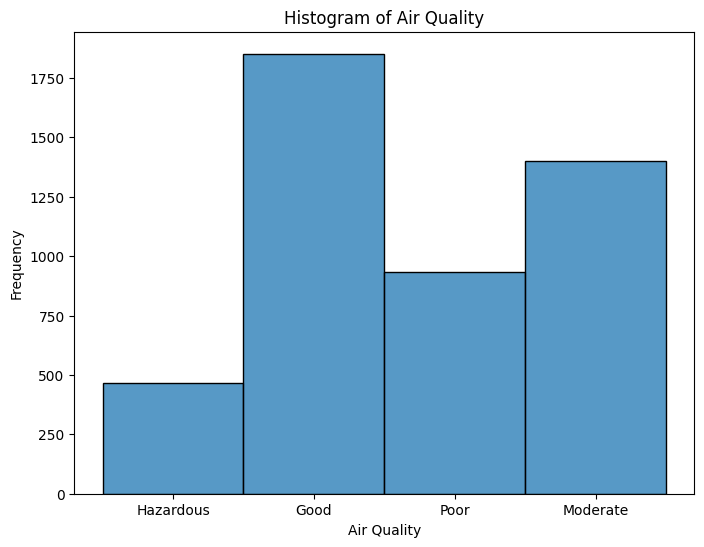

Air Quality
Good         1852
Moderate     1399
Poor          934
Hazardous     468
Name: count, dtype: int64

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(df_positive['Air Quality'], bins=20)
plt.title(f'Histogram of Air Quality')
plt.xlabel('Air Quality')
plt.ylabel('Frequency')
plt.show()

df_positive['Air Quality'].value_counts()